Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 20, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,924 (30.95 KB)

 Trainable params: 7,924 (30.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.3292 - loss: 1.4352 - val_accuracy: 0.5875 - val_loss: 0.9867
Epoch 2/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5352 - loss: 1.0193 - val_accuracy: 0.6800 - val_loss: 0.7385
Epoch 3/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6496 - loss: 0.7898 - val_accuracy: 0.7775 - val_loss: 0.6009
Epoch 4/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7043 - loss: 0.6903 - val_accuracy: 0.8275 - val_loss: 0.4994
Epoch 5/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7330 - loss: 0.6032 - val_accuracy: 0.8075 - val_loss: 0.4708
Epoch 6/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7547 - loss: 0.5581 - val_accuracy: 0.7925 - val_loss: 0.4827
Epoch 7/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7585 - loss: 0.5311 - val_accuracy: 0.8750 - val_loss: 0.3575
Epoch 8/150
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7891 - loss: 0.4801 - val_accuracy: 0.

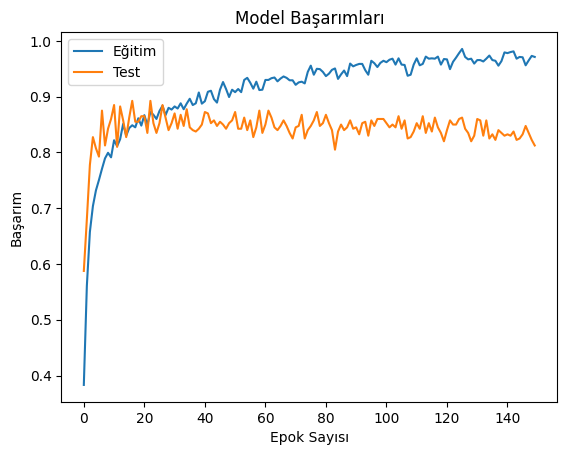

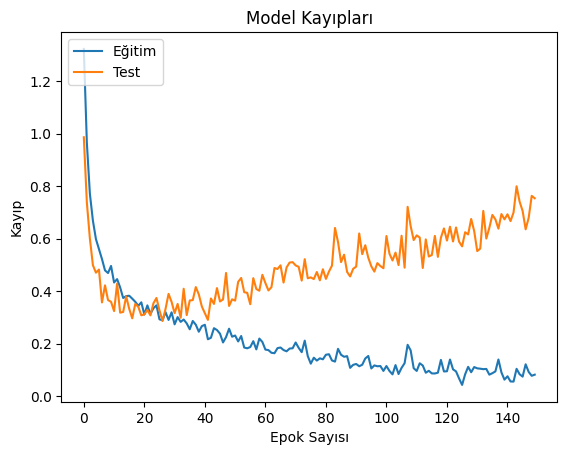

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


veri = pd.read_csv("/content/train.csv")


label_encoder = LabelEncoder().fit(veri.price_range)
labels = label_encoder.transform(veri.price_range)
classes = list(label_encoder.classes_)


X = veri.drop(["price_range"], axis=1)
y = labels


sc = StandardScaler()
X = sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    SimpleRNN(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    SimpleRNN(32, activation='tanh'),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(y_train.shape[1], activation="softmax")
])

model.summary()


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_test_reshaped, y_test),
    epochs=150,
    batch_size=32,
    verbose=1
)


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("Epok Sayısı")
plt.legend(["Eğitim", "Test"], loc="upper left")
plt.show()
